In [ ]:
# Initialization cell
try:  # for CS1302 JupyterLite pyodide kernel
    import piplite

    with open("requirements.txt") as f:
        for package in f:
            package = package.strip()
            print("Installing", package)
            await piplite.install(package)
except ModuleNotFoundError:
    pass

# Using Functions

**CS1302 Introduction to Computer Programming**
___

In [12]:
%reload_ext divewidgets

## Motivation

**How to reuse code so we can write less?**

Writing a loop is a simple way of code reuse because a piece of code is executed multiple times, once for each iteration.

```{important}

*Code reuse* gives the code an elegant *structure* that
- can be executed efficiently by a computer, and
- *interpreted* easily by a programmer.
```

**How to repeat execution at different times, in different programs, and in slightly different ways?**

## Functions

**How to calculate the logarithm?**

There is no arithmetic operator for logarithm.  
Do we have to implement it ourselves?

We can use the function `log` from the [`math` *module*](https://docs.python.org/3/library/math.html):

In [13]:
from math import log

log(256, 2)  # log base 2 of 256

8.0

The above computes the base-$2$ logarithm, $\log_2(256)$. Like functions in mathematics, a computer function `log` 
- is *called/invoked* with some input *arguments* `(256, 2)` following the function, and
- *returns* an output value computed from the input arguments.

In [14]:
# A function is callable while an integer is not
callable(log), callable(1)

(True, False)

Unlike mathematical functions:
- A python function may require no arguments, but we still need to call it with `()`. 

In [ ]:
input()

 1


'1'

- A python function may have *side effects* and return the value `None`.

In [16]:
x = print()
print(x, "of type", type(x))


None of type <class 'NoneType'>


An argument of a function call can be any expression.

In [17]:
print("1st input:", input(), "\n2nd input:", input())

 1
 2


1st input: 1 
2nd input: 2


```{note}

- The argument can also be a function call like function composition in mathematics. 
- Before a function call is executed, its arguments are evaluated first from left to right.
```

**Why not implement logarithm yourself?**

- The function from standard library is efficiently implemented and thoroughly tested/documented.
- Knowing what a function does is often insufficient for an efficient implementation.  
    (See [how to calculate logarithm](https://en.wikipedia.org/wiki/Logarithm#Calculation) as an example.)

Indeed, the `math` library does not implement `log` itself:
> **CPython implementation detail:** The `math` module consists mostly of thin *wrappers* around the platform C math library functions. - [pydoc last paragraph](https://docs.python.org/3/library/math.html)

(See the [source code wrapper for `log`](https://github.com/python/cpython/blob/e5ab0b6aa68009a3f50b141ec013dacee3676db9/Modules/mathmodule.c#L757).) 

**Exercise** 

What is a function in programming?

```{admonition} Solution
:class: dropdown

- A function is a structure that allows a piece of code to be reused in a program.  
- A function can adapt its computations to different situations using input arguments.  
```

## Import Functions from Modules

**How to import functions?**

We can use the [`import` statement](https://docs.python.org/3/reference/simple_stmts.html#import) to import multiple functions into the program *global frame*.

In [18]:
%%optlite -h 300
from math import ceil, log10

x = 1234
print("Number of digits of x:", ceil(log10(x)))

OPTWidget(value=None, height=300, script='from math import ceil, log10\n\nx = 1234\nprint("Number of digits of…

The above imports both the functions `log10` and `ceil` from `math` to compute the number $\lceil \log_{10}(x)\rceil$ of digits of a *strictly positive* integer $x$.

**How to import all functions from a library?**

In [19]:
%%optlite -h 300
from math import *  # import all except names starting with an underscore

print("{:.2f}, {:.2f}, {:.2f}".format(sin(pi / 6), cos(pi / 3), tan(pi / 4)))

OPTWidget(value=None, height=300, script='from math import *  # import all except names starting with an under…

The above uses the wildcard `*` to import ([nearly](https://docs.python.org/3/tutorial/modules.html#more-on-modules)) all the functions/variables provided in `math`.

**What if different packages define the same function?**

In [21]:
%%optlite -h 500
print("{}".format(pow(-1, 2)))
print("{:.2f}".format(pow(-1, 1 / 2)))
from math import *

print("{}".format(pow(-1, 2)))
print("{:.2f}".format(pow(-1, 1 / 2)))

OPTWidget(value=None, height=500, script='print("{}".format(pow(-1, 2)))\nprint("{:.2f}".format(pow(-1, 1 / 2)…

- The function `pow` imported from `math` overwrites the built-in function `pow`.  
- Unlike the built-in function, `pow` from `math` returns only floats but not integers or complex numbers. 
- We say that the import statement *polluted the namespace of the global frame* and caused a *name collision*. 

**How to avoid name collisions?**

In [23]:
%%optlite -h 350
import math

print("{:.2f}, {:.2f}".format(math.pow(-1, 2), pow(-1, 1 / 2)))

OPTWidget(value=None, height=350, script='import math\n\nprint("{:.2f}, {:.2f}".format(math.pow(-1, 2), pow(-1…

We can use the full name (*fully-qualified name*) `math.pow` prefixed with the module name (and possibly package names containing the module).

**Can we shorten a name?**

The name of a library can be very long and there can be a hierarchical structure as well.  
E.g., to plot a sequence using `pyplot` module from `matplotlib` package:

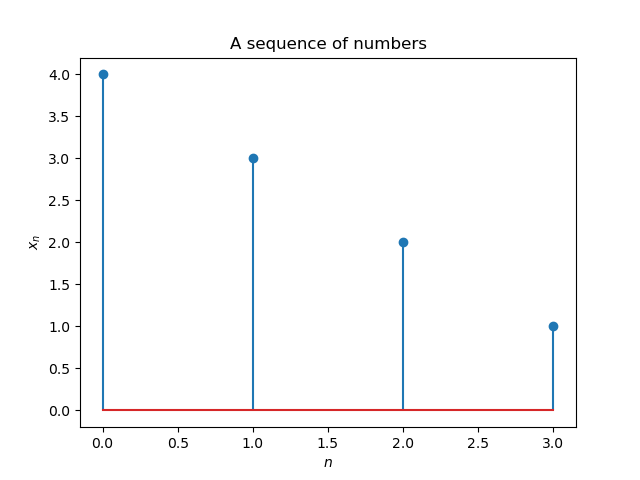

In [26]:
%matplotlib widget
import matplotlib.pyplot

matplotlib.pyplot.stem([4, 3, 2, 1])
matplotlib.pyplot.ylabel(r"$x_n$")
matplotlib.pyplot.xlabel(r"$n$")
matplotlib.pyplot.title("A sequence of numbers")
matplotlib.pyplot.show()

It is common to rename `matplotlib.pyplot` as `plt`:

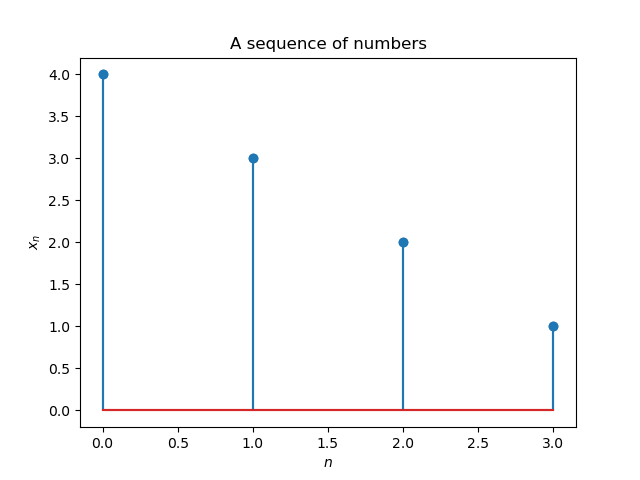

In [27]:
import matplotlib.pyplot as plt

plt.stem([4, 3, 2, 1])
plt.ylabel(r"$x_n$")
plt.xlabel(r"$n$")
plt.title("A sequence of numbers")
plt.show()

We can also rename a function as we import it to avoid name collision:

In [28]:
from math import pow as fpow

fpow(2, 2), pow(2, 2)

(4.0, 4)

**Exercise** 

What is wrong with the following code?

In [29]:
import math as m

for m in range(5):
    m.pow(m, 2)

AttributeError: 'int' object has no attribute 'pow'

```{admonition} Solution
:class: dropdown

There is a name collision: `m` is assigned to an integer in the for loop and so it is no longer the module `math` when calling `m.pow`.
```

**Exercise** 

Use the `randint` function from `random` to simulate the rolling of a die, by printing a random integer from 1 to 6. 

In [30]:
import random

print(random.randint(1, 6))

6


## Built-in Functions

**How to learn more about a function such as `randint`?**

There is a built-in function `help` for showing the *docstring* (documentation string). 

In [31]:
import random

help(random.randint)  # random must be imported before

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [32]:
help(random)  # can also show the docstring of a module

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.10/library/random.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        bytes
        -----
               uniform bytes (values between 0 and 255)
    
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)


In [29]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



We can also print the source using the inspect module:

In [63]:
import inspect

print(inspect.getsource(random.randint))

    def randint(self, a, b):
        """Return random integer in range [a, b], including both end points.
        """

        return self.randrange(a, b+1)



**Does built-in functions belong to a module?**

Indeed, every function must come from a module.

In [67]:
__builtin__.print("I am from the __builtin__ module.")

I am from the __builtin__ module.


`__builtin__` module is automatically loaded because it provides functions that are commonly use for all programs.

**How to list everything in a module?** 

We can use the built-in function `dir` (*directory*).

In [68]:
dir(__builtin__)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EncodingWarning',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIt

**Exercise** 

We can also call `dir` without arguments. What does it print?

```{hint}
Try `help(dir)` or `dir?` in jupyter notebook.
```

In [69]:
dir()

['In',
 'Out',
 '_',
 '_13',
 '_14',
 '_15',
 '_18',
 '_19',
 '_2',
 '_20',
 '_21',
 '_22',
 '_23',
 '_28',
 '_34',
 '_42',
 '_46',
 '_5',
 '_51',
 '_52',
 '_53',
 '_54',
 '_6',
 '_68',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i64',
 '_i65',
 '_i66',
 '_i67',
 '_i68',
 '_i69',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'builtins',
 'exit',
 'fpow',

In [71]:
dir?

Docstring:
dir([object]) -> list of strings

If called without an argument, return the names in the current scope.
Else, return an alphabetized list of names comprising (some of) the attributes
of the given object, and of attributes reachable from it.
If the object supplies a method named __dir__, it will be used; otherwise
the default dir() logic is used and returns:
  for a module object: the module's attributes.
  for a class object:  its attributes, and recursively the attributes
    of its bases.
  for any other object: its attributes, its class's attributes, and
    recursively the attributes of its class's base classes.
Type:      builtin_function_or_method


```{admonition} Solution
:class: dropdown

In the first line of the docstring: 
> If called without an argument, return the names in the current scope.
```